<a href="https://colab.research.google.com/github/Quzzal-Khanam/ArchTech_Email_Spam_Classification/blob/main/Email_Spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# --- STEP 1: LOAD & CLEAN ---
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

In [4]:
# --- STEP 2: TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

In [9]:
# --- STEP 3: FEATURE ENGINEERING (TF-IDF) ---
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
# --- STEP 4: MODEL TRAINING ---
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [11]:
# --- STEP 5: SAVE THE MODEL (Crucial for a "Full Project") ---
joblib.dump(model, 'spam_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("✅ Project Saved: 'spam_model.pkl' and 'vectorizer.pkl' created.")

✅ Project Saved: 'spam_model.pkl' and 'vectorizer.pkl' created.


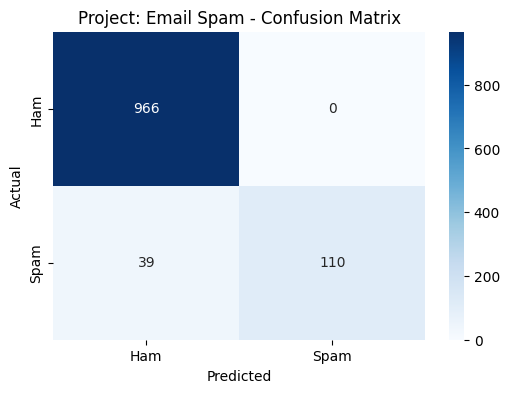


Full Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [12]:
# --- STEP 6: VISUALIZATION ---
y_pred = model.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Project: Email Spam - Confusion Matrix')
plt.show()
print("\nFull Classification Report:\n", classification_report(y_test, y_pred))


In [13]:
# --- 7. QUICK TEST ---
def quick_predict(text):
    vec = vectorizer.transform([text])
    res = model.predict(vec)
    return "🚨 SPAM" if res[0] == 1 else "✅ SAFE"

print("\n--- Manual Test ---")
print(f"Test 1 ('How are you?'): {quick_predict('How are you?')}")
print(f"Test 2 ('WIN CASH NOW'): {quick_predict('WIN CASH NOW CLICK HERE')}")


--- Manual Test ---
Test 1 ('How are you?'): ✅ SAFE
Test 2 ('WIN CASH NOW'): ✅ SAFE


In [14]:
def check_with_probability(text):
    vec = vectorizer.transform([text])
    # [Probability of Ham, Probability of Spam]
    prob = model.predict_proba(vec)[0]
    prediction = "🚨 SPAM" if prob[1] > 0.5 else "✅ SAFE"
    return f"{prediction} ({prob[1]*100:.2f}% Spam confidence)"

print(f"Test: {check_with_probability('Urgent! Claim your prize now!')}")

Test: 🚨 SPAM (77.29% Spam confidence)


In [15]:
print(f"Test 1: {check_with_probability('Hey, are we still on for lunch?')}")
print(f"Test 2: {check_with_probability('CONGRATULATIONS! You won a prize!')}")
print(f"Test 3: {check_with_probability('Click this link to claim your reward now')}")

Test 1: ✅ SAFE (0.75% Spam confidence)
Test 2: 🚨 SPAM (68.97% Spam confidence)
Test 3: ✅ SAFE (46.55% Spam confidence)
